# Sklearn学习记录
Sklearn作为python机器学习领域举足轻重的库，在人工智能很火的今天，也受到了广泛的关注。Sklearn其中包含了数据预处理、特征选取、模型选择、交叉验证、聚类等方面的函数，确实非常的强大。首先照例导入老相识库。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1、数据预处理
数据预处理指的是将原始数据通过一定的处理变成机器学习算法的输入，一般来说，数据预处理决定了算法准确率的上界，因此这在机器学习中是非常重要的一部分。主要分为标准化、二值化、缺失值处理。
### 标准化
标准化对于很对机器学习都很重要，它指的是通过平移中心、除以方差得到平均值为0、方差为1的标准正态分布。这里不介绍直接使用函数的用法，介绍sklearn中常用的将其作为一个对象处理的方法。

In [2]:
from sklearn import preprocessing

In [3]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
# 通过设置参数也可只平移或缩放
standard_scaler = preprocessing.StandardScaler().fit(X_train)
standard_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
standard_scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

除此之外，通常也有将数据缩放到某个范围的需要，这时可以用MinMaxScaler或者MaxAbsScaler(后者是绝对值缩放)。

In [5]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler([0,4])
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[2.        , 0.        , 4.        ],
       [4.        , 2.        , 1.33333333],
       [0.        , 4.        , 0.        ]])

### 二值化
二值化是将连续的数值特征转换为0-1两种类型的数据的过程，主要的参数是阈值threshold。

In [6]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = preprocessing.Binarizer().fit(X)
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

### 类别编码
类别编码主要是用来处理文本数据，将文本数据转化为不同的数字。类别编码分为两种，第一种是每个类别用一个数字表示，一个特征处理后的数据仍然是一列数据，第二种是one-hot编码，每个类别变为一个特征。

In [7]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [8]:
lb = preprocessing.LabelBinarizer()
lb.fit(["paris", "paris", "tokyo", "amsterdam"])
lb.transform(["tokyo", "tokyo", "paris"])

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

值得注意的是这两个函数也能够处理int类型的变量，比oneHoter功能较强。但是这两个均一次只能够处理一列数据，因此对整个数据集处理需要循环。新版本0.20的CategoricalEncoder扩展了这两个功能。

### 缺失数据处理
实际上这一步应该在最开始介绍，因为缺失数据可能会影响一些预处理算法的正常运行。处理缺失数据最简单的方法是丢失有缺失值的行或者列，这样简单粗暴的方法也会丢掉一些有用信息。因此比较常用的方法是利用中位数、平均数或者出现频率最高的数字来填充。

In [9]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))                 

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


这样简单的数字数据的缺失问题就得到了解决，但是字符类型的缺失问题并没有解决。字符类型的一般需要使用Pandas来解决。

## 2、特征提取
在进行完机器学习最麻烦的预处理之后(个人认为),我们需要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从特征是否发散和特征与目标的相关性来进行选择。  
* 单变量因素分析：通过一定的指标来判断单个特征与目标值的关联关系，这里可以利用卡方分布，F值等指标，互信息指标。
    * 回归指标：f_regression,mutual_info_regression
    * 分类指标：卡方分布chi2 ,f_classif, mutual_info_classif
* 递归特征消除： 利用一个模型来评价每个特征的权重，删除不重要的一个，然后继续迭代
* 利用模型直接消除： 利用一个模型来评价每个特征的重要性，删除重要性低于阈值的特征

In [10]:
from sklearn import datasets

In [11]:
# 从数据集中得到手写数字识别数据和目标
X = datasets.load_digits()['data']
Y = datasets.load_digits()['target']
(X.shape,Y.shape)

((1797, 64), (1797,))

In [12]:
# 1 单变量因素分析
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
select = SelectKBest(mutual_info_classif,40)
X_new = select.fit_transform(X,Y)
select.scores_

array([0.        , 0.14120498, 0.3707164 , 0.1941337 , 0.15140587,
       0.25471565, 0.19489996, 0.03661306, 0.00101285, 0.2808442 ,
       0.33928455, 0.13923242, 0.18945522, 0.34258656, 0.14226452,
       0.01062065, 0.        , 0.16635666, 0.25401044, 0.27412697,
       0.36716099, 0.44267935, 0.22933705, 0.        , 0.        ,
       0.25861679, 0.40714241, 0.26678509, 0.3885343 , 0.30943624,
       0.4015582 , 0.02315389, 0.00244486, 0.41920534, 0.4473156 ,
       0.30890697, 0.35854987, 0.26247734, 0.33611487, 0.04012269,
       0.01429927, 0.28080319, 0.39868866, 0.39528717, 0.31216306,
       0.16912318, 0.32176004, 0.02106102, 0.        , 0.05830372,
       0.26623367, 0.27167508, 0.18002977, 0.32275494, 0.37804414,
       0.09408823, 0.        , 0.07899824, 0.36541609, 0.23500028,
       0.2754045 , 0.38913411, 0.26470638, 0.08786643])

In [13]:
# 最终选出了前40个特征
X_new.shape

(1797, 40)

In [14]:
# 2 递归特征消除法
from sklearn import feature_selection
from sklearn import linear_model
select = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select=40)
select.fit_transform(X,Y)

array([[ 0.,  5., 13., ...,  0.,  0.,  0.],
       [ 0.,  0., 12., ..., 10.,  0.,  0.],
       [ 0.,  0.,  4., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  1., 11., ...,  6.,  0.,  0.],
       [ 0.,  2., 10., ..., 12.,  0.,  0.],
       [ 0., 10., 14., ..., 12.,  1.,  0.]])

In [15]:
select.ranking_
# 最终选择的表示为1

array([25,  1,  1,  1,  1,  1,  1, 16,  1,  1, 15,  4,  1,  1,  1,  5, 14,
        3,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1, 12,  1, 20, 24,  1,
        1,  9,  1, 17,  1, 23, 22,  1,  1,  1,  1,  1,  1, 18, 19,  7,  8,
        6,  1,  1,  1,  1, 21, 11,  2,  1, 13,  1,  1,  1])

In [16]:
# 3 直接使用模型 默认是阈值均值
select = feature_selection.SelectFromModel(linear_model.LogisticRegression(penalty="l1", C=0.1))
X_new = select.fit_transform(X,Y)
X_new.shape

(1797, 48)

## 3、监督学习模型
监督学习是机器学习中最普遍的一类学习方法，也就是学习X到Y的一个映射，常见的学习方法有，决策树、逻辑回归、SVM和一些集成学习方法。使用主要分为两个部分训练和测试。其实具体方法不需要介绍，只需要知道将处理好的模型先选定参数进行训练，然后得到结果(个人认为是最简单的一步)。

In [17]:
# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [18]:
# 这里直接使用KNN最近邻方法来解决问题
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

如果对于一个算法我们有许多超参数需要调试，可以使用交叉验证来进行调参，有0.3比例的简单交叉验证，也可以使用K折交叉验证。

In [19]:
from sklearn.model_selection import GridSearchCV
# 定义要调试的参数
par = {'n_neighbors':np.arange(5,10),'algorithm':['auto','brute']}
grid = GridSearchCV(KNeighborsClassifier(),par,cv = 3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'algorithm': ['auto', 'brute'], 'n_neighbors': array([5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
# 得到测试分数
grid.cv_results_['mean_test_score']

array([0.97921862, 0.97256858, 0.9758936 , 0.97007481, 0.97007481,
       0.97921862, 0.97256858, 0.9758936 , 0.97007481, 0.96924356])

In [21]:
# 得到表现最好的参数对应的模型
model = grid.best_estimator_
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## 4、模型评估
得到了训练的模型之后，我们可以在测试集或者训练集对这个模型进行评价。首先可以使用K折交叉验证(每个都是先训练然后再验证)来评价模型的效果，或者学习曲线。

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

In [23]:
result = cross_validate(model,X_train,y_train)
result

c:\users\zhouc\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00300527, 0.00200486, 0.00201297]),
 'score_time': array([0.05665517, 0.05461693, 0.04962397]),
 'test_score': array([0.97777778, 0.98503741, 0.97481108]),
 'train_score': array([0.99122807, 0.98628429, 0.98883375])}

学习曲线这个函数很有趣，是通过可视化的结果来观察某个参数和训练结果的关系。下面我们使用SVC(SVM的分类形式)来介绍一下画图。

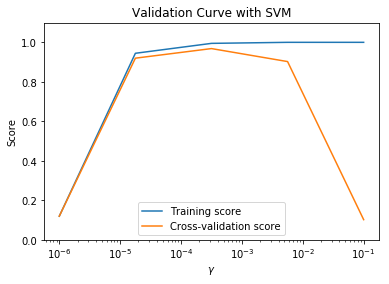

In [24]:
from sklearn.svm import SVC
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(SVC(), X, Y, param_name="gamma", param_range=param_range,cv=10, scoring="accuracy")
# 得到的训练结果是k折的，所以需要取一下平均
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.semilogx(param_range, train_scores_mean, label="Training score")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.legend(loc="best")
plt.show()

我们接下来对结果进行进一步的指标衡量，sklearn.metrics模块包含分数、优劣的衡量。

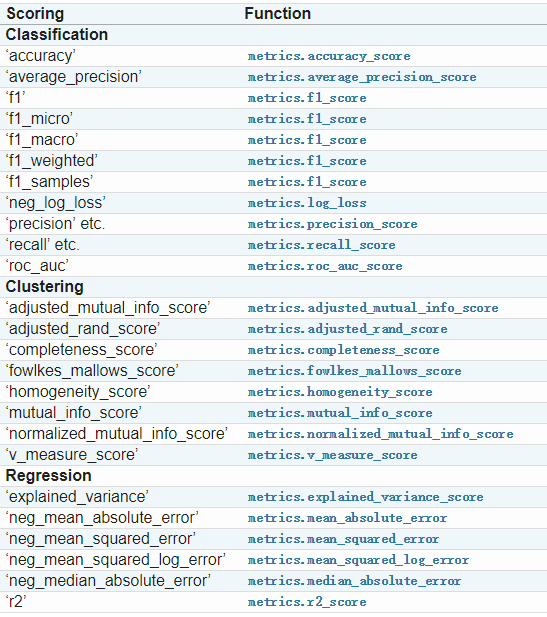

In [25]:
# 分类衡量
from sklearn import metrics
metrics.accuracy_score(y_test,model.predict(X_test))

0.9814814814814815

In [26]:
print(metrics.classification_report(y_test,model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       0.95      0.98      0.97        62
          2       1.00      1.00      1.00        59
          3       0.97      0.98      0.98        63
          4       0.98      0.98      0.98        62
          5       0.97      1.00      0.98        60
          6       1.00      1.00      1.00        60
          7       0.96      1.00      0.98        54
          8       0.98      0.93      0.96        58
          9       1.00      0.93      0.96        56

avg / total       0.98      0.98      0.98       594



## 5、聚类分析
Sklearn.cluster包括许多流行的聚类算法。聚类属于非监督学习，是将类似的数据进行聚合的过程。输入需要分类的数据和分类数量，的到分类的结果，也可以对数据进行测试。这一块做得比较少，简单举个例子。

In [27]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, 1, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[1., 2.],
       [4., 2.]])

## 6、总结
Python数据分析相关的库有Numpy、Pandas、Matplotlib、Scipy、Sklearn和Tensorflow等等。库在不断地更新，也在不断地增加，对于我们使用者来说，没有办法顾全库的方方面面，因此我们需要有选择的学习库的使用。对我来说就是首先需要明确库的用途和场合，以便之后解决问题。其次对库的框架有一个清晰地了解，对每一部分的功能和基本概念有所了解。最后就是学习资料的搜集和整理（首选官方文档，之后是一些学习经验）。学习库不是目的，我们最终的目的是培养解决问题的思维和能力，知行合一。